#  <div style='text-align: center;' > <span style="color:green">  Report   </span> </div> 

# <span style="color:green">Vegetable yield and emission of different compounds from year 2000 to 2015 </span>

### Author:

    Bilal Ahmad Butt

### Structure of the report


<ul>
    <li>Import Packages</li>
    <li>Introduction</li>
    <ul>
        <li>Motivation</li>
        <li>Problem</li>
    </ul>
    <li>Method</li>
    <ul>
        <li>Explanation of Datasets</li>
        <ul>
            <li>Datasource 1: Vegetables yield year 2000 to 2015</li>
            <li>Datasource 2: Emissions to water year 2000 to 2015 </li>
        </ul>
        <li>Building data pipeline </li>
        <li>Data cleaning </li>
        <li>Data transformation</li>
        <li>Load Data </li>
        <li>Datasource 1 - Analysis of Vegetable data </li>
        <ul>
            <li>1.1 - Preprocess data</li>
            <li>1.2 - Filter data </li>
            <li>1.3 - Analysis </li>
        </ul>
        <li>Datasource 2 - Analysis of Water emission data </li>
        <ul>
            <li>2.1 - Preprocess data</li>
            <li>2.2 - Filter data </li>
            <li>2.3 - Analysis </li>
        </ul>
    </ul>
    <li> Result </li>
    <ul>
        <li>Vegetable accumulation results </li>
        <li>Water accumulation results </li>
    </ul>
    <li>Disscusion</li>
    <li>Conclusion</li>

</ul>

### <span style="color:red"> NOTE: </span> Kindly visit data_exploration.ipnyb for detailed insights on data.

## Import Packages

In [1]:
import os
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from scipy.stats import pearsonr
from sqlalchemy import create_engine

#  <span style="color:purple"> Introduction </span>

## Motivation

<ul>
    <li>Reduce the water poluution</li>
    <li>Protect water</li>
    <li>Food security</li>
    <li>Improve economy</li>
    <li>Improve health and reduce diseases</li>        
</ul>

## Problem

In this document I will try to answer below questions.
<ul>
    <li>Clean the data. </li>
    <li>Has the vegetable yield is increased or decreased? </li>
    <li>Has the pollution of water increased or decreased? </li>
    <li>What is the relation between vegetable yield and water? </li>

</ul>

Additionally, I will be handling below issues:

<ul>
    <li>Preprocess the data. </li>
    <li>Analyze the data.</li>
    <li>Presenting them in nice visual tool.</li>
    <li>Present the findings.</li>

</ul>

#  <span style="color:purple"> Method </span>

## Explanation of Datasets

### Datasource 1: Vegetables yield year 2000 to 2015

Data engieering is done for 2000, 2005, 2010, 2015.

This dataset contains information about the harvest of vegetables in the european country Netherlands.
It concerns the harvest of vegetables (total yield in million-kg) and the corresponding cropping area (in hectares). But overhere, my focus would be total yield in million-kg for year 

Gross yield = The yield of vegetables in million kg.

The vegetables are broken down as follows:
- Other vegetables (Garlic and Onion)
- Strawberry
- Spinach
- Belgian Endive
- Lettuce
- Iceberg
- Tuberous
- Carrot
- Cabbage
- Legume
- Bean
- Apple
- Courgette

* Data URL:  https://opendata.cbs.nl/statline/#/CBS/en/dataset/37738ENG/table
* <a href='https://opendata.cbs.nl/statline/#/CBS/en/dataset/37738ENG/table'>Data URL</a>
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/37738ENG/TypedDataSet?dl=9ADD1
* Data Type: CSV


### Datasource 2: Emissions to water year 2000 to 2015

Data engieering is done for 2000, 2005, 2010, 2015.

This datset provided information about the origin of emissions to water of nutrients and heavy metals into water. These data are part of the environmental accounts. Direct emissions are emitted directly into the environment. Indirect emissions reach the environment in an indirect way. For example, discharges to the sewer system partly reach the surface water after treatment in wastewater treatment plants.

Factors like:
- Industrial waste
- Chemical manufactruing waste 
- Pharmaceuticals manufactruing waste 

Heavy metals:

A group of metals with a high atomic weight, in particular metals with high toxicity, such as:
- Chromium
- Copper	
- Mercury
- Lead	
- Nickel	
- Zinc	

Nutrients: 

Compounds which are necessary for the growth of crops and plant, such as:
- Phosphorus
- Nitrogen

* Data URL: https://opendata.cbs.nl/statline/#/CBS/en/dataset/83605ENG/table?ts=1698675109480
* CSV Downloadable URL: https://opendata.cbs.nl/CsvDownload/csv/83605ENG/TypedDataSet?dl=9ADCA  
* Data Type: CSV

## Building data pipeline

<ul>
    <li> To be able to get the data from the sources url -> created a class DataPipeline in pipeline.py file. </li>
    <li>Implemented functional methods</li>
    <ul>
        <li>download_data(): to down the data </li>
        <li>transform_data(): to tranform the data</li>
        <li>establish_database_connection(): creates databse and connects with it and return a cursor to perform CRUD on db</li>
        <li>load_data(): to transport all the cleaned and transformed into database.</li>
        <li>run_pipeline(): a driver method to initial all the process</li>
    </ul>
    <li>Implemented utility methods</li>
    <ul>
        <li>get_all_data_from_database(table_name): get all content from a specified table</li>
        <li> get_connection(): get the connection of database</li>
    </ul>
</ul>

## Data cleaning


<ul>
    <li>Using pandas read_csv, downloaded the data and cleaned it</li>
    <li>Separated the data based on delimeter semi-colon(;)</li>
    <li>Configured that on receiving a bad line which is out of UTF8 to be skipped</li>
    <li>Took out the coloumns (headers) out of data</li>
    <li>Set the first coloumn (header) as a Index</li>
</ul>

## Data transformation

<li>Based on the datasources, different transformations were performed</li>


<li>Datasource 1 - Vegetable data </li>
<ul>
    <li>Setup the index and renamed it for easier access </li>
    <li>Renamed all the indexes </li>
    <li>Corrected the names of columns</li>
    <li>Discarded the unesscary columns</li>
</ul>
<li>Datasource 2 - Water data </li>
<ul>
    <li>Setup the index and renamed it for easier access</li>
    <li>Renamed the columns </li>
    <li>Replaced 0 values with the average</li>
    <li>Removed the columns with NAN value</li>
</ul>

## Load Data

As, the data has been downloaded, cleaned and trasformed and loaded in the database.

It is time to laod it from the database as demonstrated below.

In [36]:
_database = '../data/data.sqlite'

In [3]:
# If database doesn't exist, run datapipeline to create it
if not os.path.exists(_database):
    subprocess.run(["python", "../project/pipeline.py"])

# Load data from database
engine = create_engine(f'sqlite:///{_database}')
connection = engine.connect()

df_vegetable = pd.read_sql_table('vegetable', connection,index_col='Vegetables')
df_water = pd.read_sql_table('water', connection, index_col='Origin')

##  <span style="color:red"> **Datasource 1 - Analysis of Vegetable data** </span>

### 1.1 - Preprocess data

In [4]:
df_vegetable.columns

Index(['year', 'gross_yield_million_kilogram'], dtype='object')

In [5]:
df_vegetable.index.name

'Vegetables'

In [6]:
df_vegetable.index.unique()

Index(['Onion/Garlic', 'Strawberry', 'Spinach', 'Belgian endive', 'Lettuce',
       'Iceberg', 'Tuberous', 'Radishes', 'Carrot', 'Cabbage', 'Legume',
       'Bean', 'Apple', 'Courgette'],
      dtype='object', name='Vegetables')

In [7]:
# Convert European punkt (,) to American decimal (.)
df_vegetable["gross_yield_million_kilogram"] =  df_vegetable["gross_yield_million_kilogram"].str.replace(',','.')

# Sorting by column 'gross_yield_million_kilogram'
df_vegetable = df_vegetable.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)

# Convert data type from string to float
df_vegetable["gross_yield_million_kilogram"] = df_vegetable.gross_yield_million_kilogram.astype(float)

In [8]:
df_vegetable.dtypes

year                              int64
gross_yield_million_kilogram    float64
dtype: object

## <span style="color:blue"> **1.2 - Filter Data** </span> 

In [9]:
# Filter data by year
# # Method 1 (works): Select subset from dataframe
fixed_year_2000 = df_vegetable.loc[df_vegetable['year'] == 2000]
fixed_year_2005 = df_vegetable.loc[df_vegetable['year'] == 2005]

fixed_year_2010 = df_vegetable.loc[df_vegetable['year'] == 2010]
fixed_year_2015 = df_vegetable.loc[df_vegetable['year'] == 2015]


In [10]:
# Filter data by index
onion = df_vegetable.loc[df_vegetable.index == 'Onion/Garlic']
Strawberry = df_vegetable.loc[df_vegetable.index == 'Strawberry']
Spinach = df_vegetable.loc[df_vegetable.index == 'Spinach']
Belgian_endive = df_vegetable.loc[df_vegetable.index == 'Belgian endive']
Lettuce = df_vegetable.loc[df_vegetable.index == 'Lettuce']
Iceberg = df_vegetable.loc[df_vegetable.index == 'Iceberg']
Tuberous = df_vegetable.loc[df_vegetable.index == 'Tuberous']
Radishes = df_vegetable.loc[df_vegetable.index == 'Radishes']
Carrot = df_vegetable.loc[df_vegetable.index == 'Carrot']
Cabbage = df_vegetable.loc[df_vegetable.index == 'Cabbage']
Legume = df_vegetable.loc[df_vegetable.index == 'Legume']
Bean = df_vegetable.loc[df_vegetable.index == 'Bean']
Apple = df_vegetable.loc[df_vegetable.index == 'Apple']
Courgette = df_vegetable.loc[df_vegetable.index == 'Courgette']

## <span style="color:blue"> **1.3 - Analysis** </span> 

<function matplotlib.pyplot.show(close=None, block=None)>

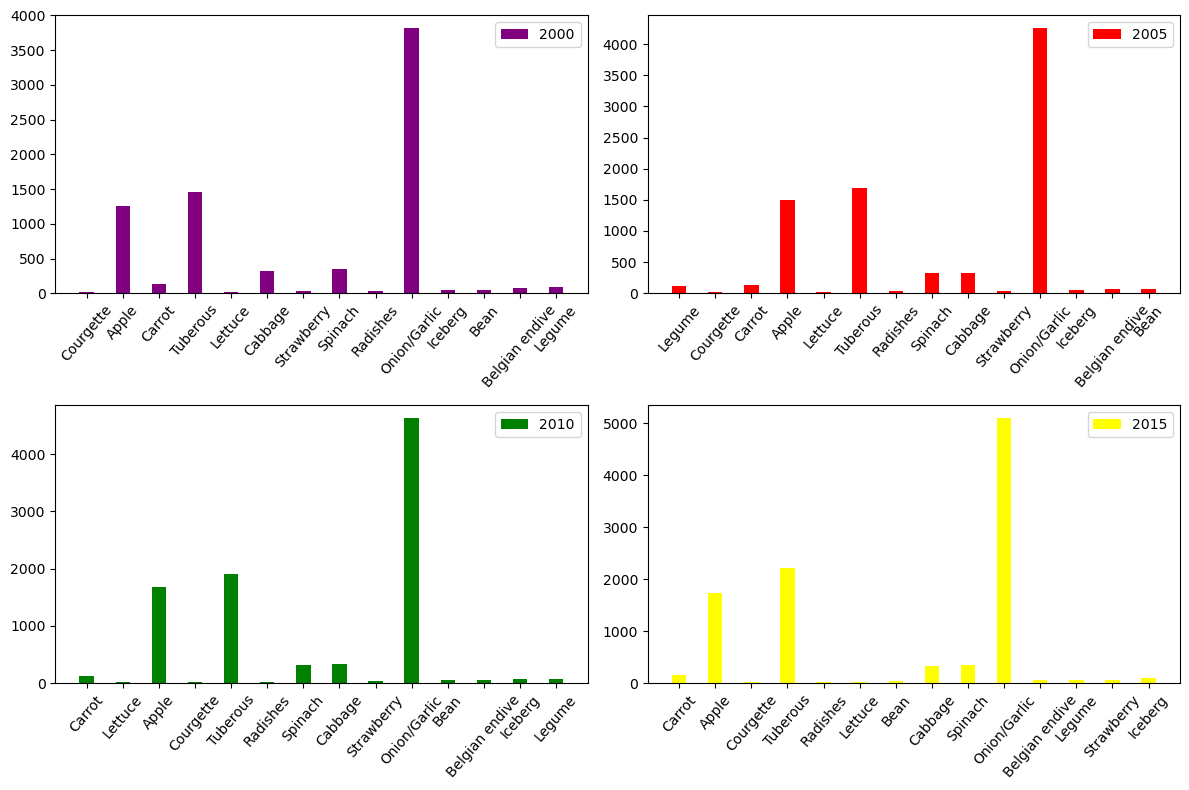

In [11]:
# Plot for all vegetables for a single fixed Year 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].bar(fixed_year_2000.index, fixed_year_2000.gross_yield_million_kilogram,  0.4, label='2000', color='purple')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].bar(fixed_year_2005.index, fixed_year_2005.gross_yield_million_kilogram,  0.4, label='2005', color='red')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=49)

axes[1,0].bar(fixed_year_2010.index, fixed_year_2010.gross_yield_million_kilogram,  0.4, label='2010', color='green')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].bar(fixed_year_2015.index, fixed_year_2015.gross_yield_million_kilogram,  0.4, label='2015', color='yellow')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=49)

fig.tight_layout()
plt.show

Object `## Method 2: works fine` not found.


<function matplotlib.pyplot.show(close=None, block=None)>

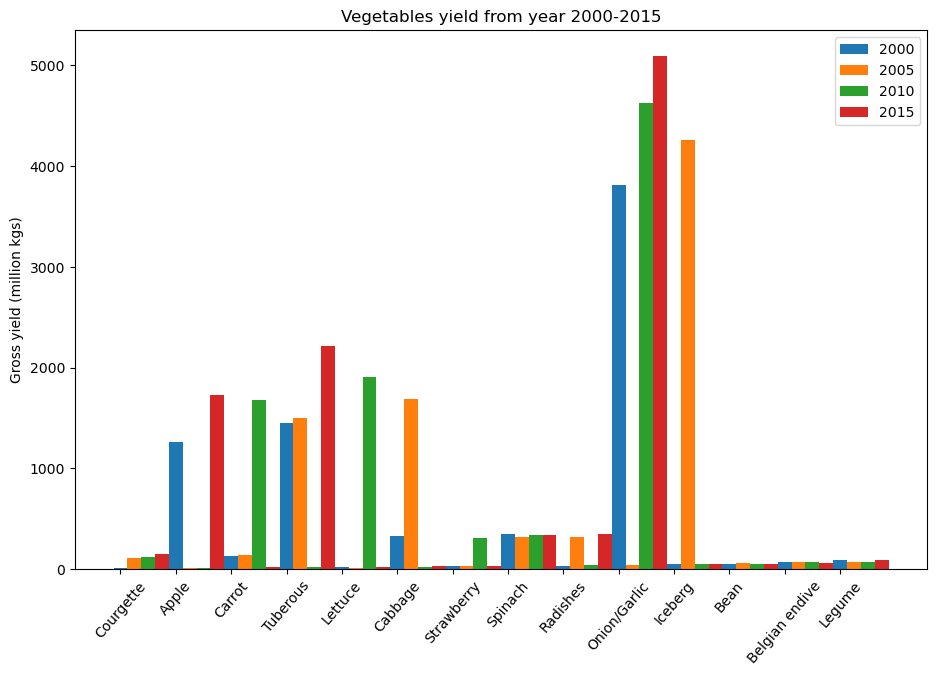

In [12]:
?## Method 2: works fine
ind = np.arange(len(fixed_year_2000))  
width = 0.25

plt.figure(figsize=(11, 7))
plt.subplot(1, 1, 1)

plt.bar(ind+width, fixed_year_2000.gross_yield_million_kilogram,  width, label='2000')
plt.bar(ind+width*2, fixed_year_2005.gross_yield_million_kilogram,  width, label='2005')
plt.bar(ind+width*3, fixed_year_2010.gross_yield_million_kilogram,  width, label='2010')
plt.bar(ind+width*4, fixed_year_2015.gross_yield_million_kilogram,  width, label='2015')

plt.legend()
plt.title('Vegetables yield from year 2000-2015')
plt.ylabel('Gross yield (million kgs)')
plt.xticks(ind+width, fixed_year_2000.index) 
plt.xticks(rotation=49)
plt.show


In [13]:
# 1.2.2 - Plot of a single vegetable over the years 

# Sort according to ['year']
# This steps will be done over here (lazmi to keep it here and not move upward in filter)

onion = onion.sort_values(by=['year'], axis=0, ascending=True)
Strawberry = Strawberry.sort_values(by=['year'], axis=0, ascending=True)
Spinach = Spinach.sort_values(by=['year'], axis=0, ascending=True)
Belgian_endive = Belgian_endive.sort_values(by=['year'], axis=0, ascending=True)
Lettuce = Lettuce.sort_values(by=['year'], axis=0, ascending=True)
Iceberg = Iceberg.sort_values(by=['year'], axis=0, ascending=True)
Tuberous = Tuberous.sort_values(by=['year'], axis=0, ascending=True)
Radishes = Radishes.sort_values(by=['year'], axis=0, ascending=True)
Carrot = Carrot.sort_values(by=['year'], axis=0, ascending=True)
Cabbage = Cabbage.sort_values(by=['year'], axis=0, ascending=True)
Legume = Strawberry.sort_values(by=['year'], axis=0, ascending=True)
Bean = Lettuce.sort_values(by=['year'], axis=0, ascending=True)
Apple = Apple.sort_values(by=['year'], axis=0, ascending=True)
Courgette = Courgette.sort_values(by=['year'], axis=0, ascending=True)

<function matplotlib.pyplot.show(close=None, block=None)>

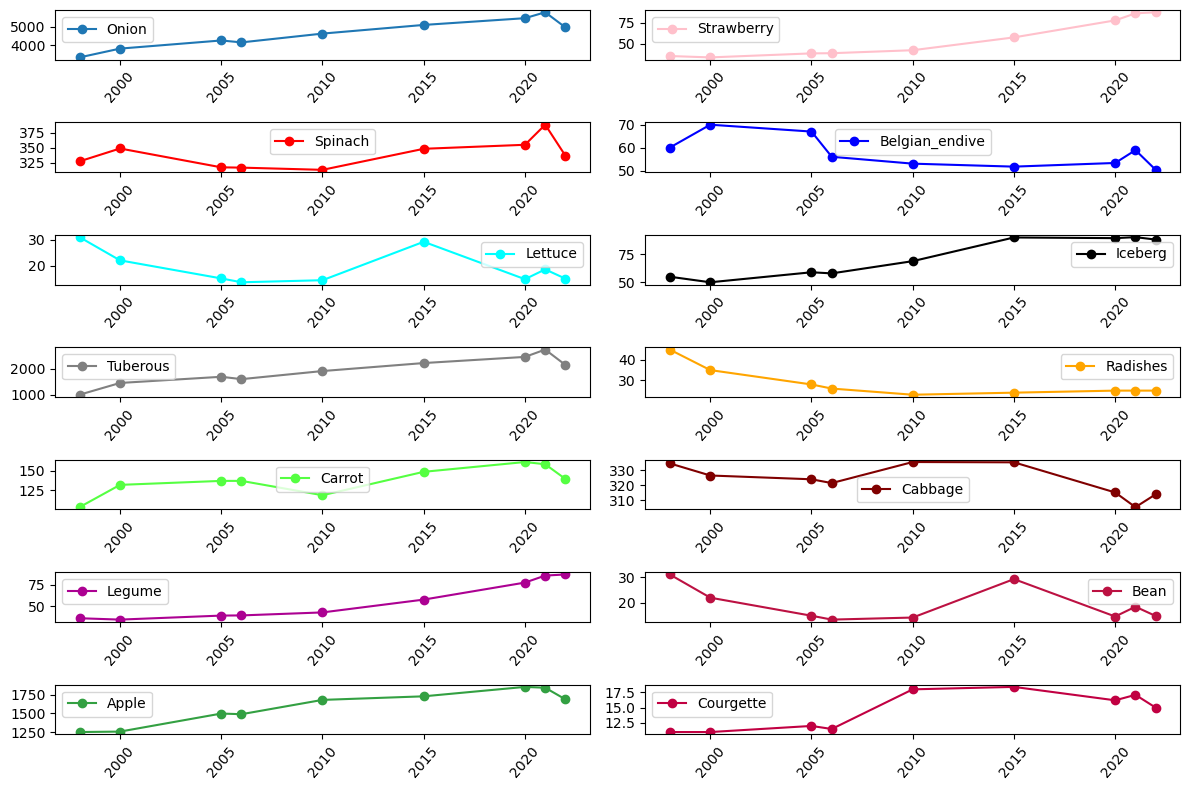

In [14]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(12, 8))

axes[0,0].plot(onion.year, onion.gross_yield_million_kilogram, 'o-', label='Onion')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].plot(Strawberry.year, Strawberry.gross_yield_million_kilogram, 'o-', label='Strawberry', color='pink')
axes[0,1].legend()
axes[0,1].tick_params(axis='x', rotation=49)

axes[1,0].plot(Spinach.year, Spinach.gross_yield_million_kilogram, 'o-', label='Spinach', color='red')
axes[1,0].legend()
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].plot(Belgian_endive.year, Belgian_endive.gross_yield_million_kilogram, 'o-', label='Belgian_endive', color='blue')
axes[1,1].legend()
axes[1,1].tick_params(axis='x', rotation=49)

axes[2,0].plot(Lettuce.year, Lettuce.gross_yield_million_kilogram, 'o-', label='Lettuce', color='cyan')
axes[2,0].legend()
axes[2,0].tick_params(axis='x', rotation=49)

axes[2,1].plot(Iceberg.year, Iceberg.gross_yield_million_kilogram, 'o-', label='Iceberg', color='black')
axes[2,1].legend()
axes[2,1].tick_params(axis='x', rotation=49)

axes[3,0].plot(Tuberous.year, Tuberous.gross_yield_million_kilogram, 'o-', label='Tuberous', color='gray')
axes[3,0].legend()
axes[3,0].tick_params(axis='x', rotation=49)

axes[3,1].plot(Radishes.year, Radishes.gross_yield_million_kilogram, 'o-', label='Radishes', color='orange')
axes[3,1].legend()
axes[3,1].tick_params(axis='x', rotation=49)

axes[4,0].plot(Carrot.year, Carrot.gross_yield_million_kilogram, 'o-', label='Carrot', color='#55FF42')
axes[4,0].legend()
axes[4,0].tick_params(axis='x', rotation=49)

axes[4,1].plot(Cabbage.year, Cabbage.gross_yield_million_kilogram, 'o-', label='Cabbage', color='maroon')
axes[4,1].legend()
axes[4,1].tick_params(axis='x', rotation=49)

axes[5,0].plot(Legume.year, Legume.gross_yield_million_kilogram, 'o-', label='Legume', color='#AC0192')
axes[5,0].legend()
axes[5,0].tick_params(axis='x', rotation=49)

axes[5,1].plot(Bean.year, Bean.gross_yield_million_kilogram, 'o-', label='Bean', color='#BC1142')
axes[5,1].legend()
axes[5,1].tick_params(axis='x', rotation=49)

axes[6,0].plot(Apple.year, Apple.gross_yield_million_kilogram, 'o-', label='Apple', color='#33A042')
axes[6,0].legend()
axes[6,0].tick_params(axis='x', rotation=49)

axes[6,1].plot(Courgette.year, Courgette.gross_yield_million_kilogram, 'o-', label='Courgette', color='#C10042')
axes[6,1].legend()
axes[6,1].tick_params(axis='x', rotation=49)

fig.tight_layout()

plt.show

<!-- # Vegetable accumulation analysis -->

#  <span style="color:red"> **Datasource 2 - Analysis of Water emission data** </span>

## <span style="color:blue"> **2.1 - Preprocess data** </span>  

In [15]:
# Set name of columns
df_water.columns = ["Year", "Chromium", "Copper", "Mercury", "Lead", "Nickel", "Zinc", "Nitrogen", "Phosphorus"]

In [16]:
df_water = df_water.dropna(axis=0)

## <span style="color:blue"> **2.2 - Filter Data** </span> 

In [17]:
df_water.Year.unique()

array([1995., 2000., 2005., 2010., 2013., 2014.])

In [18]:
# Filter data 2.1.1 - By Year

# # Method 2 (works):
# # year_df_vegetable = df_vegetable[df_vegetable['year'] == 2010]

water_year_2000 = df_water[df_water['Year'] == 2000]
water_year_2005 = df_water[df_water['Year'] == 2005]
water_year_2010 = df_water[df_water['Year'] == 2010]
water_year_2015 = df_water[df_water['Year'] == 2014]

In [19]:
# Filter data 2.1.2 - By Column

Chromium = df_water[['Chromium']]
Copper = df_water[['Copper']]
Mercury = df_water[['Mercury']]
Lead = df_water[['Lead']]
Nickel = df_water[['Nickel']]
Zinc = df_water[['Zinc']]
Nitrogen = df_water[['Nitrogen']]
Phosphorus = df_water[['Phosphorus']]

In [20]:
# Filter data 2.1.3 - By Index

# Agriculture = df_water.loc[df_water.index == 'Agriculture']
Industrial = df_water.loc[df_water.index == 'Industrial']
Chemical_Manufacturing = df_water.loc[df_water.index == 'Chemical Manufacturing']
Pharmaceuticals_Manufacturing = df_water.loc[df_water.index == 'Pharmaceuticals Manufacturing']

## <span style="color:blue"> **2.3 - Analysis** </span> 

<function matplotlib.pyplot.show(close=None, block=None)>

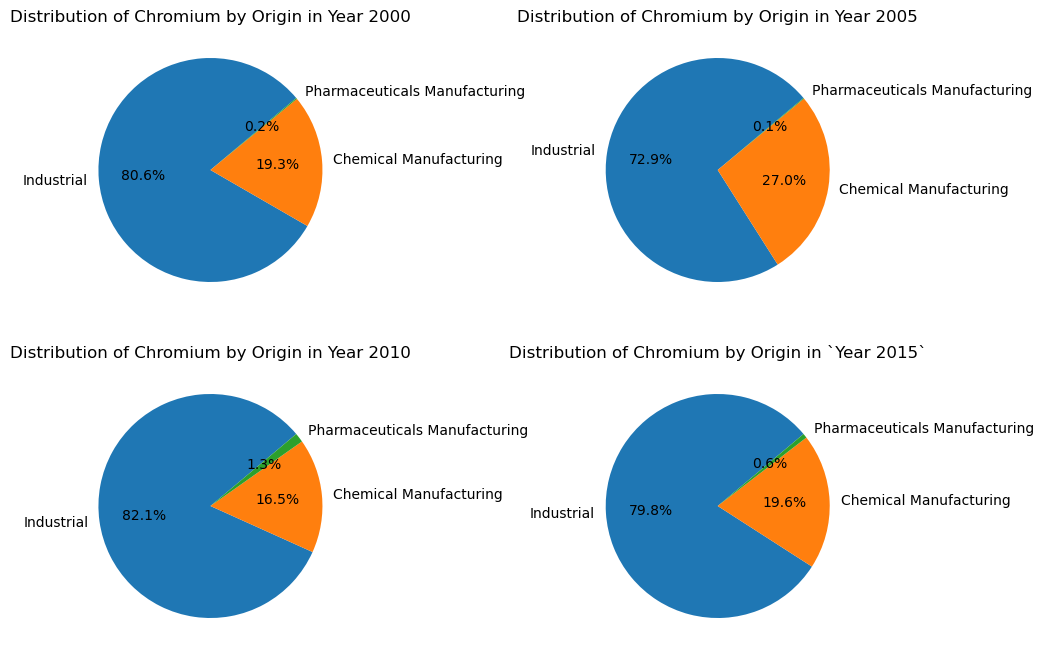

In [21]:
# 2.2.1 - Plot By year 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axes[0,0].pie(water_year_2000.Chromium[:], labels=water_year_2000.index, autopct='%1.1f%%', startangle=40)
axes[0,0].set_title('Distribution of Chromium by Origin in Year 2000')

axes[0,1].pie(water_year_2005.Chromium[:], labels=water_year_2005.index, autopct='%1.1f%%', startangle=40)
axes[0,1].set_title('Distribution of Chromium by Origin in Year 2005')

axes[1,0].pie(water_year_2010.Chromium[:], labels=water_year_2010.index, autopct='%1.1f%%', startangle=40)
axes[1,0].set_title('Distribution of Chromium by Origin in Year 2010')

axes[1,1].pie(water_year_2015.Chromium[:], labels=water_year_2015.index, autopct='%1.1f%%', startangle=40)
axes[1,1].set_title('Distribution of Chromium by Origin in `Year 2015`')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

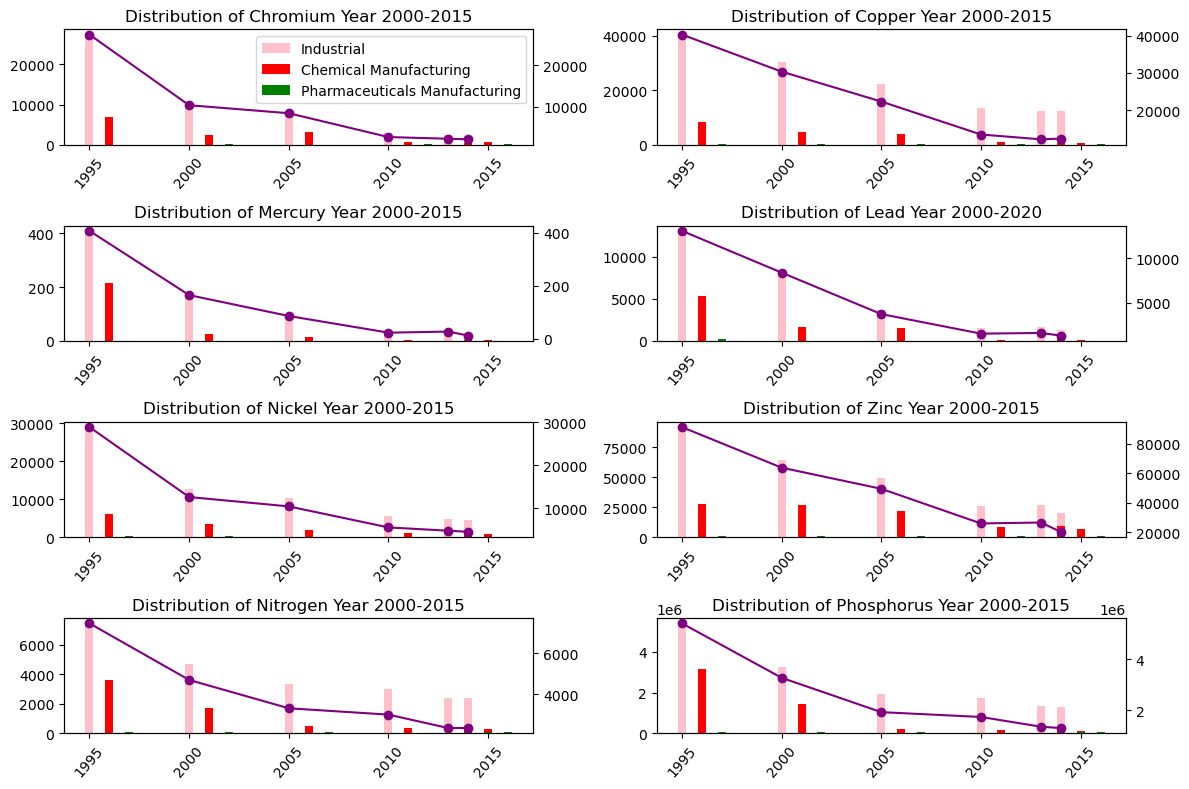

In [22]:
# fig, axes = matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 8))

# Chromium	Copper	Mercury	Lead	Nickel	Zinc	OtherNutrients	Phosphorus

# Chromium
axes[0,0].bar(df_water.Year.unique()[:], Chromium[Chromium.index == 'Industrial'].Chromium[:],  0.4, label='Industrial', color='pink')
axes[0,0].bar(df_water.Year.unique()[:]+1, Chromium[Chromium.index == 'Chemical Manufacturing'].Chromium[:],  0.4, label='Chemical Manufacturing', color='red')
axes[0,0].bar(df_water.Year.unique()[:]+2, Chromium[Chromium.index == 'Pharmaceuticals Manufacturing'].Chromium[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[0,0].legend()
axes[0,0].tick_params(axis='x', rotation=49)
axes[0,0].set_title('Distribution of Chromium Year 2000-2015')

ax2 = axes[0,0].twinx()
ax2.plot(df_water.Year.unique(), Chromium[Chromium.index == 'Industrial'].Chromium[:], 'o-', color='purple')


# Copper
axes[0,1].bar(df_water.Year.unique()[:], Copper[Copper.index == 'Industrial'].Copper[:],  0.4, label='Industrial', color='pink')
axes[0,1].bar(df_water.Year.unique()[:]+1, Copper[Copper.index == 'Chemical Manufacturing'].Copper[:],  0.4, label='Chemical Manufacturing', color='red')
axes[0,1].bar(df_water.Year.unique()[:]+2, Copper[Copper.index == 'Pharmaceuticals Manufacturing'].Copper[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[0,1].tick_params(axis='x', rotation=49)
axes[0,1].set_title('Distribution of Copper Year 2000-2015')

ax2 = axes[0,1].twinx()
ax2.plot(df_water.Year.unique(), Copper[Copper.index == 'Industrial'].Copper[:], 'o-', color='purple')


# Mercury 
axes[1,0].bar(df_water.Year.unique()[:], Mercury[Mercury.index == 'Industrial'].Mercury[:],  0.4, label='Industrial', color='pink')
axes[1,0].bar(df_water.Year.unique()[:]+1, Mercury[Mercury.index == 'Chemical Manufacturing'].Mercury[:],  0.4, label='Chemical Manufacturing', color='red')
axes[1,0].bar(df_water.Year.unique()[:]+2, Mercury[Copper.index == 'Pharmaceuticals Manufacturing'].Mercury[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[1,0].tick_params(axis='x', rotation=49)
axes[1,0].set_title('Distribution of Mercury Year 2000-2015')

ax2 = axes[1,0].twinx()
ax2.plot(df_water.Year.unique(), Mercury[Mercury.index == 'Industrial'].Mercury[:], 'o-', color='purple')


# Lead
axes[1,1].bar(df_water.Year.unique()[:], Lead[Lead.index == 'Industrial'].Lead[:],  0.4, label='Industrial', color='pink')
axes[1,1].bar(df_water.Year.unique()[:]+1, Lead[Lead.index == 'Chemical Manufacturing'].Lead[:],  0.4, label='Chemical Manufacturing', color='red')
axes[1,1].bar(df_water.Year.unique()[:]+2, Lead[Lead.index == 'Pharmaceuticals Manufacturing'].Lead[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[1,1].tick_params(axis='x', rotation=49)
axes[1,1].set_title('Distribution of Lead Year 2000-2020')

ax2 = axes[1,1].twinx()
ax2.plot(df_water.Year.unique(), Lead[Lead.index == 'Industrial'].Lead[:], 'o-', color='purple')

# Nickel
axes[2,0].bar(df_water.Year.unique()[:], Nickel[Nickel.index == 'Industrial'].Nickel[:],  0.4, label='Industrial', color='pink')
axes[2,0].bar(df_water.Year.unique()[:]+1, Nickel[Nickel.index == 'Chemical Manufacturing'].Nickel[:],  0.4, label='Chemical Manufacturing', color='red')
axes[2,0].bar(df_water.Year.unique()[:]+2, Nickel[Nickel.index == 'Pharmaceuticals Manufacturing'].Nickel[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[2,0].tick_params(axis='x', rotation=49)
axes[2,0].set_title('Distribution of Nickel Year 2000-2015')

ax2 = axes[2,0].twinx()
ax2.plot(df_water.Year.unique(), Nickel[Nickel.index == 'Industrial'].Nickel[:], 'o-', color='purple')


# Zinc
axes[2,1].bar(df_water.Year.unique()[:], Zinc[Zinc.index == 'Industrial'].Zinc[:],  0.4, label='Industrial', color='pink')
axes[2,1].bar(df_water.Year.unique()[:]+1, Zinc[Zinc.index == 'Chemical Manufacturing'].Zinc[:],  0.4, label='Chemical Manufacturing', color='red')
axes[2,1].bar(df_water.Year.unique()[:]+2, Zinc[Zinc.index == 'Pharmaceuticals Manufacturing'].Zinc[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[2,1].tick_params(axis='x', rotation=49)
axes[2,1].set_title('Distribution of Zinc Year 2000-2015')

ax2 = axes[2,1].twinx()
ax2.plot(df_water.Year.unique(), Zinc[Zinc.index == 'Industrial'].Zinc[:], 'o-', color='purple')


# Nitrogen
axes[3,0].bar(df_water.Year.unique()[:], Nitrogen[Nitrogen.index == 'Industrial'].Nitrogen[:],  0.4, label='Industrial', color='pink')
axes[3,0].bar(df_water.Year.unique()[:]+1, Nitrogen[Nitrogen.index == 'Chemical Manufacturing'].Nitrogen[:],  0.4, label='Chemical Manufacturing', color='red')
axes[3,0].bar(df_water.Year.unique()[:]+2, Nitrogen[Nitrogen.index == 'Pharmaceuticals Manufacturing'].Nitrogen[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[3,0].tick_params(axis='x', rotation=49)
axes[3,0].set_title('Distribution of Nitrogen Year 2000-2015')

ax2 = axes[3,0].twinx()
ax2.plot(df_water.Year.unique(), Nitrogen[Nitrogen.index == 'Industrial'].Nitrogen[:], 'o-', color='purple')


# Phosphorus
axes[3,1].bar(df_water.Year.unique()[:], Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:],  0.4, label='Industrial', color='pink')
axes[3,1].bar(df_water.Year.unique()[:]+1, Phosphorus[Phosphorus.index == 'Chemical Manufacturing'].Phosphorus[:],  0.4, label='Chemical Manufacturing', color='red')
axes[3,1].bar(df_water.Year.unique()[:]+2, Phosphorus[Phosphorus.index == 'Pharmaceuticals Manufacturing'].Phosphorus[:],  0.4, label='Pharmaceuticals Manufacturing', color='green')
axes[3,1].tick_params(axis='x', rotation=49)
axes[3,1].set_title('Distribution of Phosphorus Year 2000-2015')

ax2 = axes[3,1].twinx()
ax2.plot(df_water.Year.unique(), Phosphorus[Phosphorus.index == 'Industrial'].Phosphorus[:], 'o-', color='purple')

fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

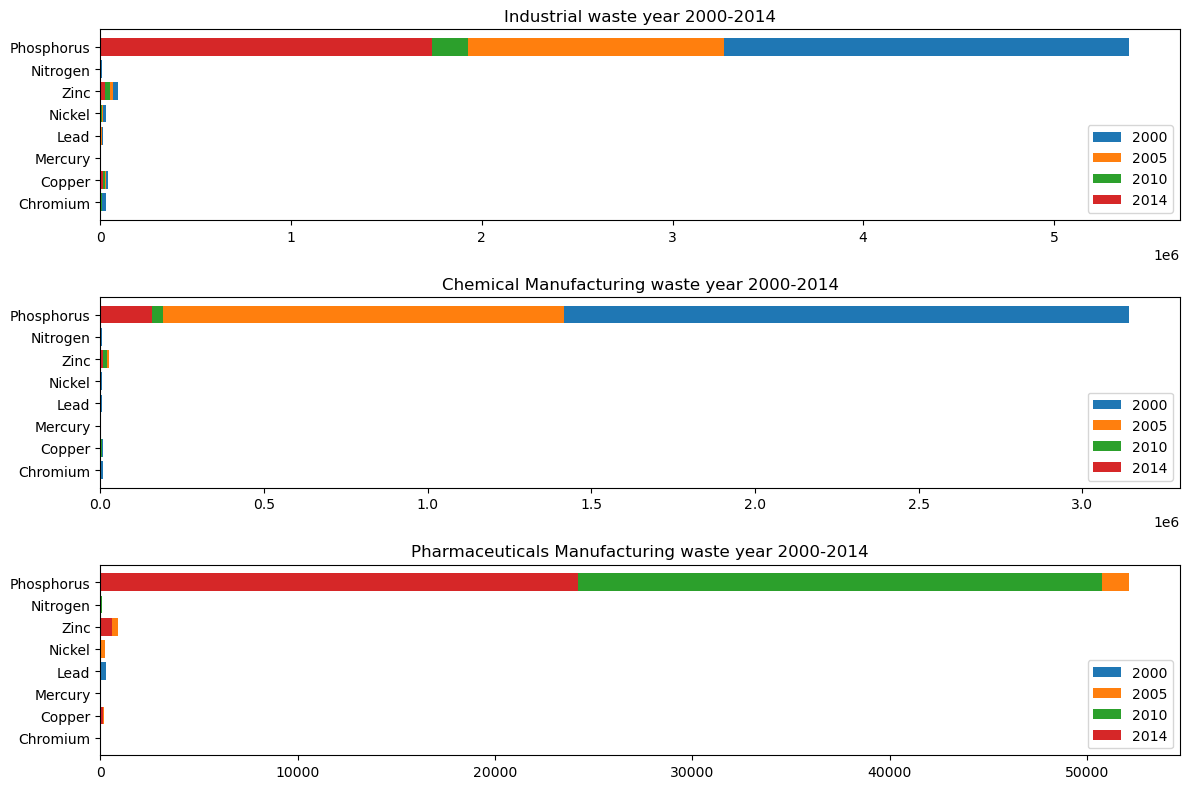

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

# Industrial
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[0][1:], label='2000')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[1][1:], label='2005')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[2][1:], label='2010')
axes[0].barh(Industrial.iloc[0][1:].index, Industrial.iloc[3][1:], label='2014')

axes[0].legend(loc = 'lower right')
axes[0].set_title('Industrial waste year 2000-2014')


axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[0][1:], label='2000')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[1][1:], label='2005')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[2][1:], label='2010')
axes[1].barh(Chemical_Manufacturing.iloc[0][1:].index, Chemical_Manufacturing.iloc[3][1:], label='2014')

axes[1].legend(loc = 'lower right')
axes[1].set_title('Chemical Manufacturing waste year 2000-2014')


axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[0][1:], label='2000')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[1][1:], label='2005')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[2][1:], label='2010')
axes[2].barh(Pharmaceuticals_Manufacturing.iloc[0][1:].index, Pharmaceuticals_Manufacturing.iloc[3][1:], label='2014')

axes[2].legend(loc = 'lower right')
axes[2].set_title('Pharmaceuticals Manufacturing waste year 2000-2014')

fig.tight_layout()
plt.show

#  <span style="color:purple"> Result </span> 

## Vegetable accumulation results

In [24]:
# Collapse all vegeatbles by summing them over the years
vegetable_wise = df_vegetable.groupby(df_vegetable.index).sum()
# Drop year column
vegetable_wise = vegetable_wise.drop(['year'], axis=1)
# Sort the rows according to the total yield
vegetable_wise = vegetable_wise.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)


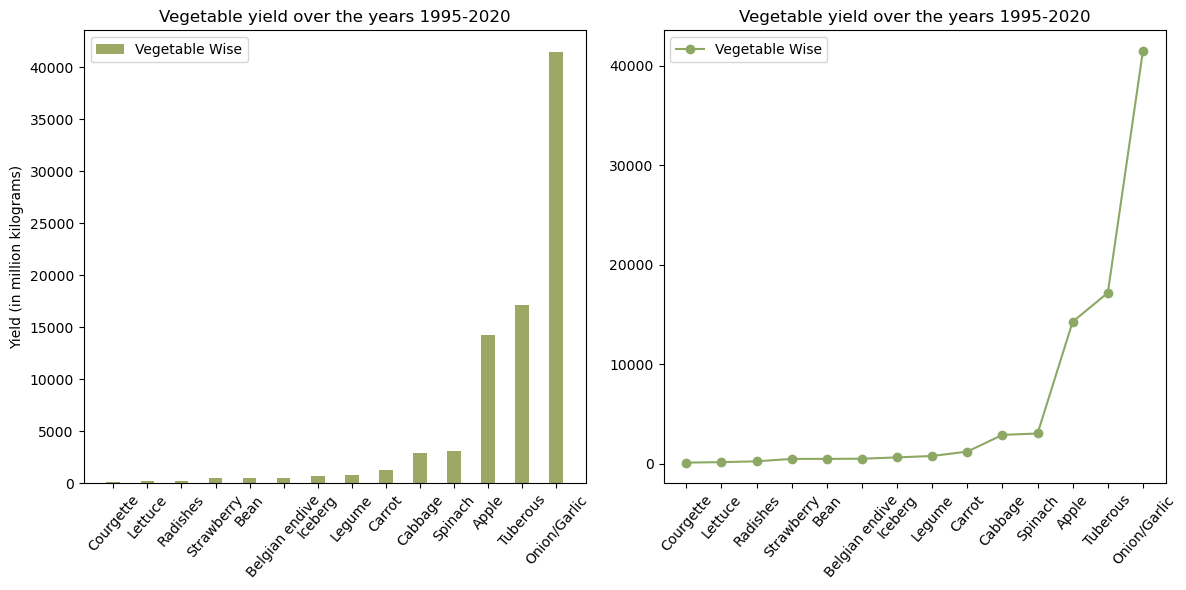

In [25]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(vegetable_wise.index, vegetable_wise.gross_yield_million_kilogram, 0.4, label='Vegetable Wise', color='#9CA864')

ax1.legend()
ax1.set_title('Vegetable yield over the years 1995-2020')
ax1.set_ylabel('Yield (in million kilograms)')
ax1.tick_params(axis='x', rotation=49)

ax3.plot(vegetable_wise.index, vegetable_wise.gross_yield_million_kilogram, 'o-', label='Vegetable Wise', color='#8CA864')

ax3.legend()
ax3.set_title('Vegetable yield over the years 1995-2020')
ax3.tick_params(axis='x', rotation=49)

plt.tight_layout()
plt.show()

In [26]:
year_wise = df_vegetable.groupby('year').sum()
# Delete last two rows of daraframe
year_wise = year_wise.drop(year_wise.tail(2).index)
year_wise

,gross_yield_million_kilogram
year,
1998,6775.0
2000,7701.6
2005,8619.5
2006,8397.4
2010,9319.4
2015,10226.7
2020,10988.4


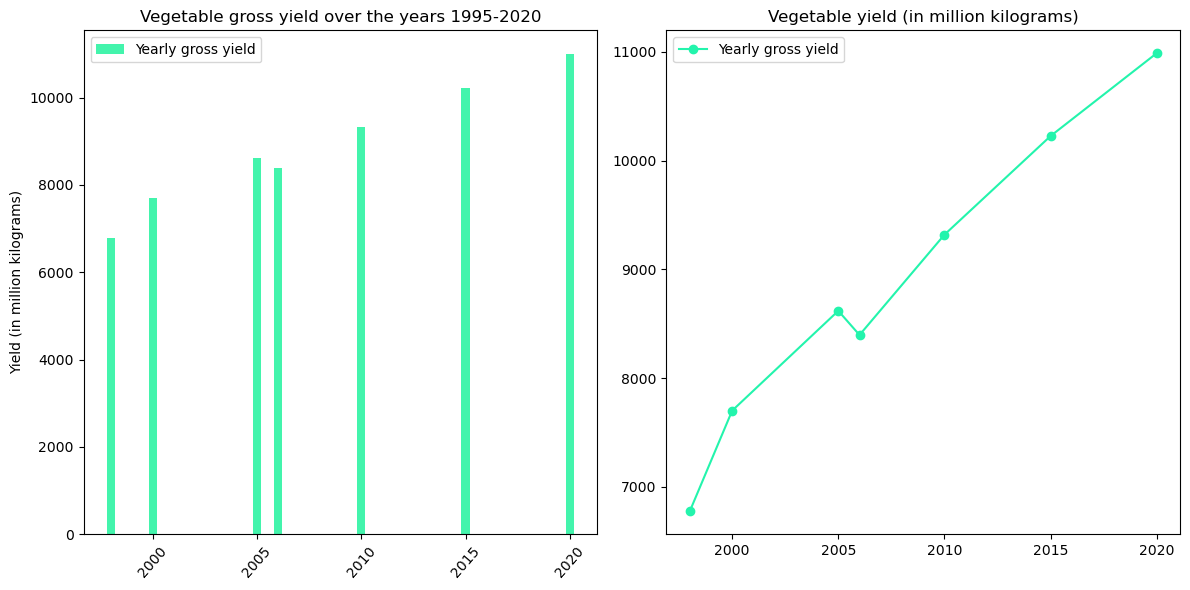

In [27]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(year_wise.index, year_wise.gross_yield_million_kilogram, 0.4, label='Yearly gross yield', color='#43F4AC')

ax1.legend()
ax1.set_title('Vegetable gross yield over the years 1995-2020')
ax1.set_ylabel('Yield (in million kilograms)')
ax1.tick_params(axis='x', rotation=49)

ax3.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Yearly gross yield', color='#23F4AC')
ax3.legend()
ax3.set_title('Vegetable yield (in million kilograms)')

plt.tight_layout()
plt.show()

## Water accumulation results

In [28]:
# Sum up all factors
factor_wise = df_water.groupby(df_water.index).sum()
# Drop year column
factor_wise = factor_wise.drop(['Year'], axis=1)
# Sort the rows according to the total yield
# factor_wise = factor_wise.sort_values(by=['gross_yield_million_kilogram'], axis=0, ascending=True)
# factor_wise

In [29]:
yearly_accumulate = df_water.groupby('Year').sum()
# Delete last two rows of daraframe
yearly_accumulate = yearly_accumulate.drop(yearly_accumulate.head(1).index)
# yearly_accumulate

In [30]:
heavy_elements_year_wise = yearly_accumulate.Chromium + yearly_accumulate.Copper + yearly_accumulate.Mercury + yearly_accumulate.Mercury + yearly_accumulate.Zinc
nutrients_year_wise = yearly_accumulate.Nitrogen + yearly_accumulate.Phosphorus
# heavy_elements_year_wise

In [31]:
heavy_elements_factor_wise = factor_wise.Chromium + factor_wise.Copper + factor_wise.Mercury + factor_wise.Mercury + factor_wise.Zinc
nutrients_factor_wise = factor_wise.Nitrogen + factor_wise.Phosphorus
# heavy_elements_factor_wise

In [32]:
# factor_wise.Chromium[:]
# nutrients_factor_wise

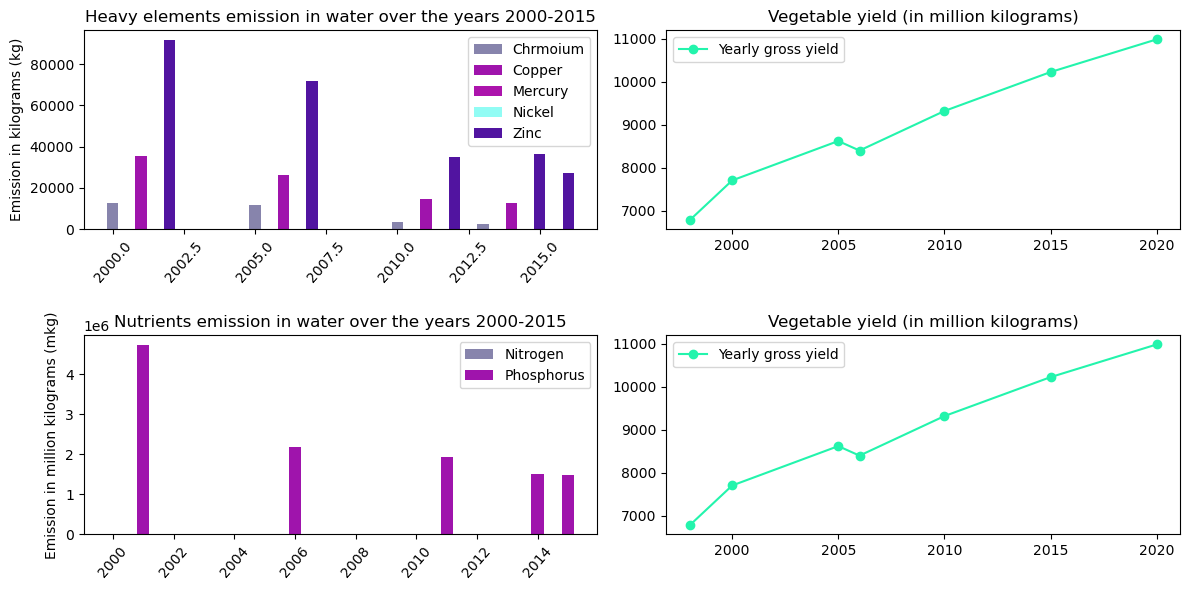

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

axes[0,0].bar(yearly_accumulate.index, yearly_accumulate.Chromium, 0.4, label='Chrmoium', color='#8784AC')
axes[0,0].bar(yearly_accumulate.index+1, yearly_accumulate.Copper, 0.4, label='Copper', color='#9F14AC')
axes[0,0].bar(yearly_accumulate.index+2, yearly_accumulate.Mercury, 0.4, label='Mercury', color='#AC14AC')
axes[0,0].bar(yearly_accumulate.index+2, yearly_accumulate.Nickel, 0.4, label='Nickel', color='#91FCF4')
axes[0,0].bar(yearly_accumulate.index+2, yearly_accumulate.Zinc, 0.4, label='Zinc', color='#5114A0')

axes[0,0].legend()
axes[0,0].set_title('Heavy elements emission in water over the years 2000-2015')
axes[0,0].set_ylabel('Emission in kilograms (kg)')
axes[0,0].tick_params(axis='x', rotation=49)

axes[0,1].plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Yearly gross yield', color='#23F4AC')
axes[0,1].legend()
axes[0,1].set_title('Vegetable yield (in million kilograms)')


axes[1,0].bar(yearly_accumulate.index, yearly_accumulate.Nitrogen, 0.4, label='Nitrogen', color='#8784AC')
axes[1,0].bar(yearly_accumulate.index+1, yearly_accumulate.Phosphorus, 0.4, label='Phosphorus', color='#9F14AC')

axes[1,0].legend()
axes[1,0].set_title('Nutrients emission in water over the years 2000-2015')
axes[1,0].set_ylabel('Emission in million kilograms (mkg)')
axes[1,0].tick_params(axis='x', rotation=49)

axes[1,1].plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Yearly gross yield', color='#23F4AC')
axes[1,1].legend()
axes[1,1].set_title('Vegetable yield (in million kilograms)')


plt.tight_layout()
plt.show()

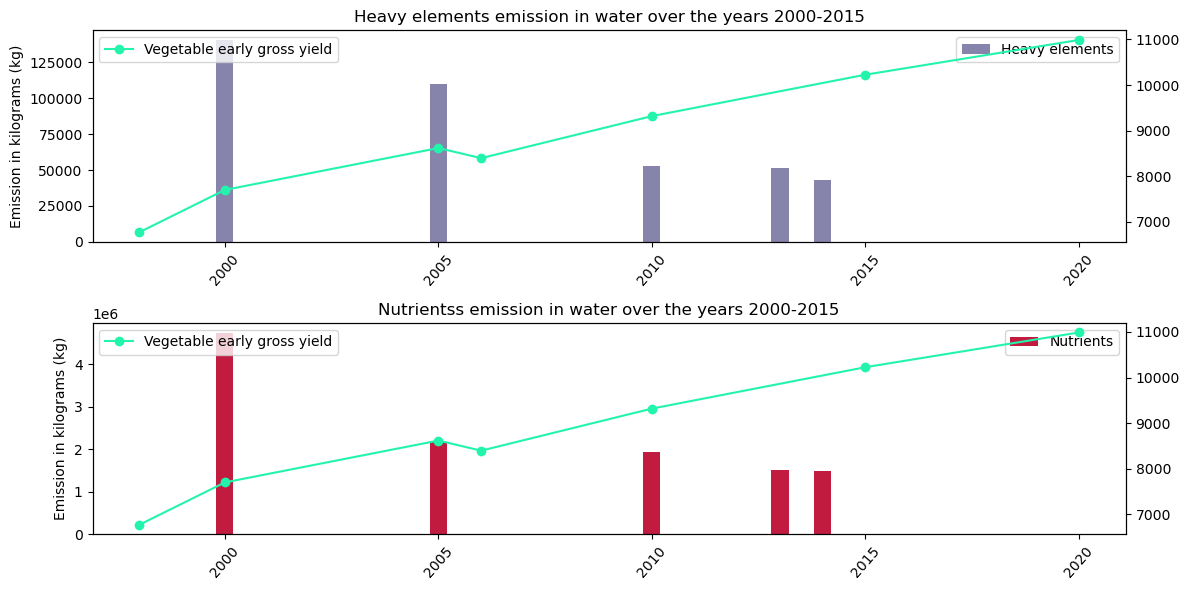

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

axes[0].bar(yearly_accumulate.index, heavy_elements_year_wise, 0.4, label='Heavy elements', color='#8784AC')
axes[0].legend()
axes[0].set_title('Heavy elements emission in water over the years 2000-2015')
axes[0].set_ylabel('Emission in kilograms (kg)')
axes[0].tick_params(axis='x', rotation=49)

ax2 = axes[0].twinx()

ax2.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Vegetable early gross yield', color='#23F4AC')
ax2.legend()


axes[1].bar(yearly_accumulate.index, nutrients_year_wise, 0.4, label='Nutrients', color='#C11C40')
axes[1].legend()
axes[1].set_title('Nutrientss emission in water over the years 2000-2015')
axes[1].set_ylabel('Emission in kilograms (kg)')
axes[1].tick_params(axis='x', rotation=49)

ax3 = axes[1].twinx()

ax3.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Vegetable early gross yield', color='#23F4AC')
ax3.legend()


plt.tight_layout()
plt.show()

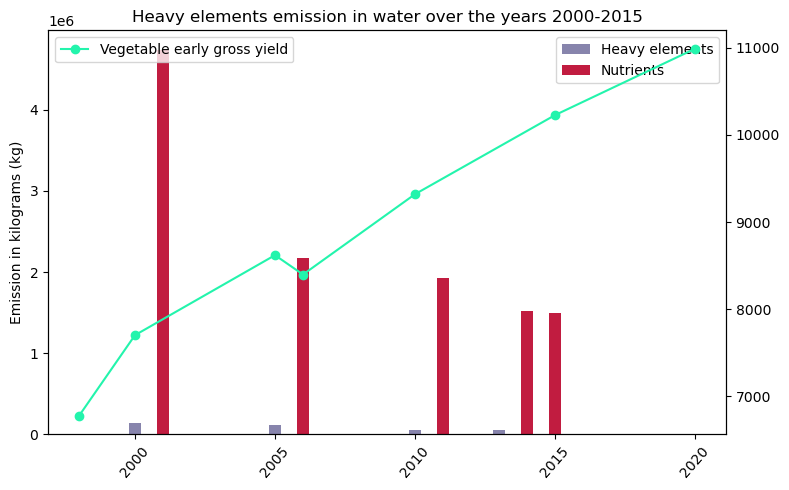

In [35]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

axes.bar(yearly_accumulate.index, heavy_elements_year_wise, 0.4, label='Heavy elements', color='#8784AC')
axes.bar(yearly_accumulate.index+1, nutrients_year_wise, 0.4, label='Nutrients', color='#C11C40')
axes.legend()
axes.set_title('Heavy elements emission in water over the years 2000-2015')
axes.set_ylabel('Emission in kilograms (kg)')
axes.tick_params(axis='x', rotation=49)

ax3 = axes.twinx()

ax3.plot(year_wise.index, year_wise.gross_yield_million_kilogram, 'o-', label='Vegetable early gross yield', color='#23F4AC')
ax3.legend()


plt.tight_layout()
plt.show()

#  <span style="color:purple"> Disscusion  </span>

#  <span style="color:purple"> Conclusions  </span>